<a href="https://colab.research.google.com/github/tfatma/projectsML/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("Melbourne_housing_extra_data.csv")

In [ ]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [ ]:
df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


In [ ]:
df["Date"]=pd.to_datetime(df["Date"],dayfirst=True)

In [ ]:
max(df["Date"].unique())

numpy.datetime64('2017-08-12T00:00:00.000000000')

In [ ]:
df["Type"].unique()

array(['h', 'u', 't'], dtype=object)

In [ ]:
# df[df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").std().head(2)
var = df[df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").std()
count = df[df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").count()
mean = df[df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()


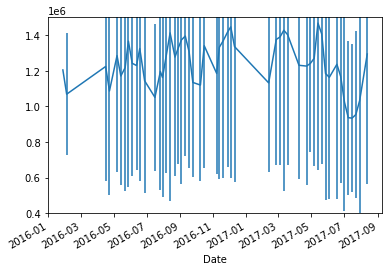

In [ ]:
mean["Price"].plot(yerr=var["Price"],ylim=(400000,1500000))

In [ ]:
means=df[(df["Type"]=="h")&(df["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").mean()
errors=df[(df["Type"]=="h")&(df["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").std()

In [ ]:
means.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

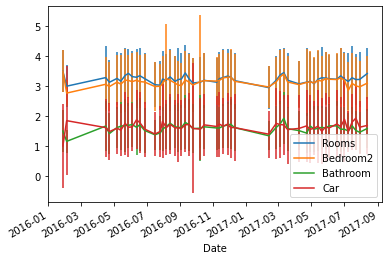

In [ ]:
means.drop(['Price', 'Distance', 'Postcode', 
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'], axis=1).plot(yerr=errors)

In [ ]:
pd.set_eng_float_format(accuracy=1,use_eng_prefix=True)
df[(df["Type"]=="h")&(df["Distance"]<14)&(df["Distance"]>13.7)].sort_values("Date",ascending=False).dropna().groupby(["Suburb","SellerG"]).mean()

Rooms   Price  ...  Longtitude  Propertycount
Suburb            SellerG                       ...                           
Albion            Barry            2.3  735.0k  ...       144.8           2.2k
                  Bells            3.0  782.0k  ...       144.8           2.2k
                  Sweeney          3.0  596.5k  ...       144.8           2.2k
                  hockingstuart    3.0  730.0k  ...       144.8           2.2k
Altona            Barlow           3.0    1.1M  ...       144.8           5.3k
                  Compton          2.0  535.6k  ...       144.8           5.3k
                  Greg             3.8    1.1M  ...       144.8           5.3k
                  hockingstuart    3.0  928.8k  ...       144.8           5.3k
Bentleigh East    Beller           3.0  900.0k  ...       145.1          11.0k
                  Buxton           3.3    1.1M  ...       145.1          11.0k
                  C21              3.3  907.7k  ...       145.1          11.0k
                  First            4.0    1.0M  ...       145.1          11.0k
                  Gary             3.5    1.2M  ...       145.0          11.0k
                  Hodges           4.2    1.3M  ...       145.1          11.0k
                  Marshall         4.0    1.4M  ...       145.1          11.0k
                  Nick             3.0    1.0M  ...       145.1          11.0k
                  RT               4.0    1.2M  ...       145.1          11.0k
                  Ray              3.0  896.7k  ...       145.1          11.0k
                  Woodards         3.2    1.1M  ...       145.1          11.0k
                  hockingstuart    3.7    1.4M  ...       145.1          11.0k
Doncaster         Barry            3.6    1.4M  ...       145.1           9.0k
                  Fletchers        3.0    1.2M  ...       145.1           9.0k
                  Jellis           3.9    1.5M  ...       145.1           9.0k
                  Philip           3.5    1.4M  ...       145.1           9.0k
                  RW               4.0    1.4M  ...       145.1           9.0k
                  Ray              3.4    1.2M  ...       145.1           9.0k
                  Vic              3.0    1.1M  ...       145.1           9.0k
                  hockingstuart    3.5    1.5M  ...       145.1           9.0k
Hampton           Hodges           4.0    2.6M  ...       145.0           5.5k
Templestowe Lower Barry            3.8    1.2M  ...       145.1           5.4k
                  Jellis           3.6    1.3M  ...       145.1           5.4k
                  Mason            4.0  790.0k  ...       145.1           5.4k
                  Philip           3.3    1.0M  ...       145.1           5.4k
                  RT               3.0  650.0k  ...       145.1           5.4k
                  Zahn             4.0    1.2M  ...       145.1           5.4k
                  hockingstuart    4.5  875.0k  ...       145.1           5.4k
Viewbank          Barry            3.0  770.0k  ...       145.1           2.7k
                  Buckingham       3.0  880.0k  ...       145.1           2.7k
                  Darren           4.0    1.0M  ...       145.1           2.7k
                  Fletchers        4.0    1.2M  ...       145.1           2.7k
                  Miles            3.6  903.0k  ...       145.1           2.7k
                  Morrison         3.0  820.0k  ...       145.1           2.7k
                  Nelson           4.0  981.7k  ...       145.1           2.7k
                  Ray              3.0  765.0k  ...       145.1           2.7k

[44 rows x 13 columns]

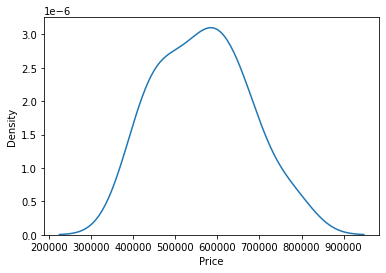

In [ ]:
sns.kdeplot(df[(df["Suburb"]=="Northcote")&(df["Type"]=="u")&(df["Rooms"]==2)]["Price"])

(0.0, 2000000.0, 0.0, 1.6777506079672868e-06)

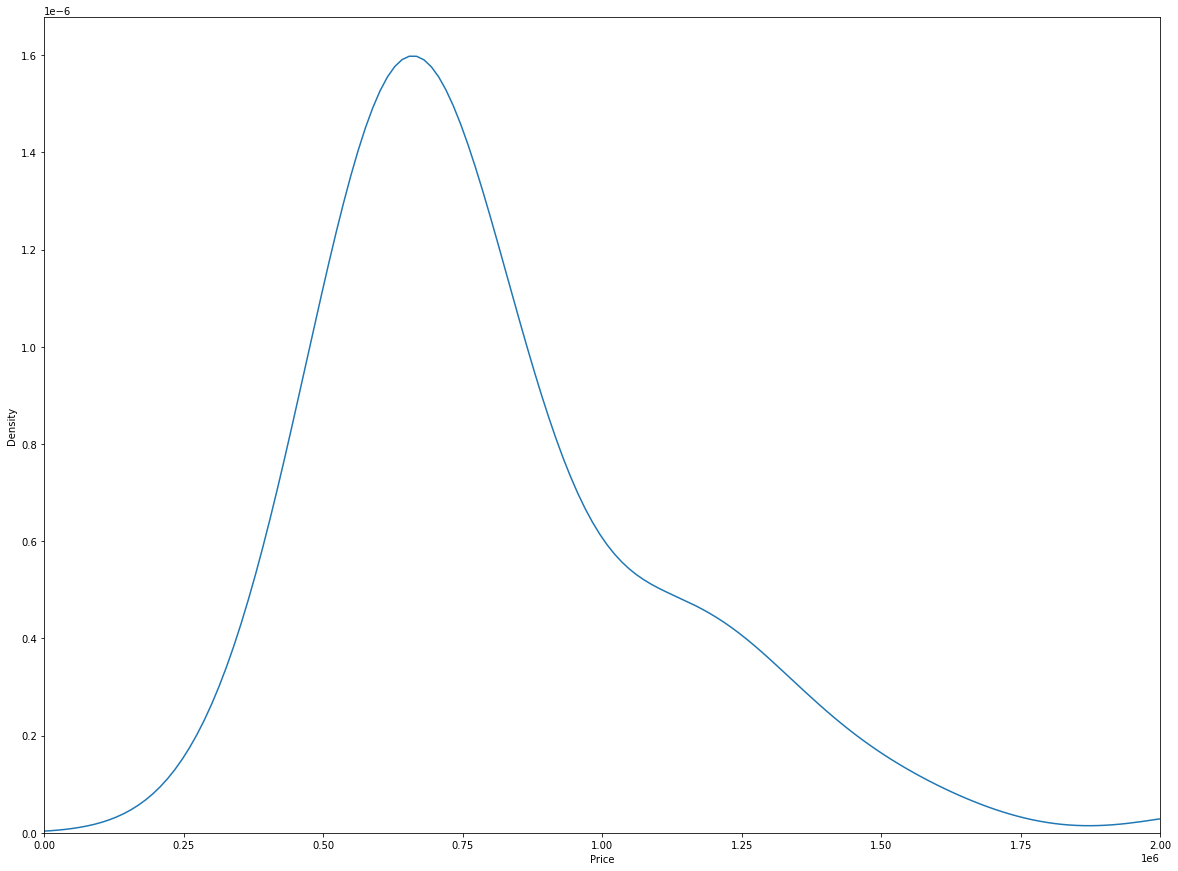

In [ ]:
plt.figure(figsize=(20,15))
my_axis = sns.kdeplot(df["Price"][((df["Type"]=="u") &
                                (df["Distance"]>8) &
                                (df["Distance"]<10) &
                                (df["Rooms"] > 2)#&
                                #(dataframe["Price"] < 1000000)
                               )])
my_axis.axis(xmin=0, xmax=2000000)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


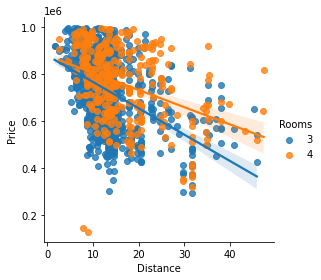

In [ ]:
sns.lmplot("Distance","Price", df[(df["Rooms"]<=4)&(df["Rooms"]>2)&(df["Type"]=="h")&(df["Price"]<1000000)].dropna(), hue="Rooms", size=4)

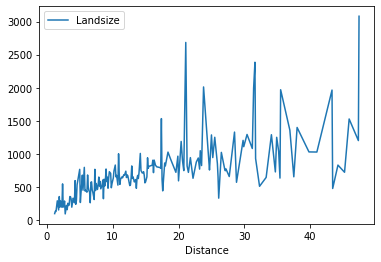

In [ ]:
df[(df["Rooms"]>2) & (df["Type"] == "h")& (df["Landsize"] <5000)][["Landsize","Distance"]].dropna().groupby("Distance").mean().plot()

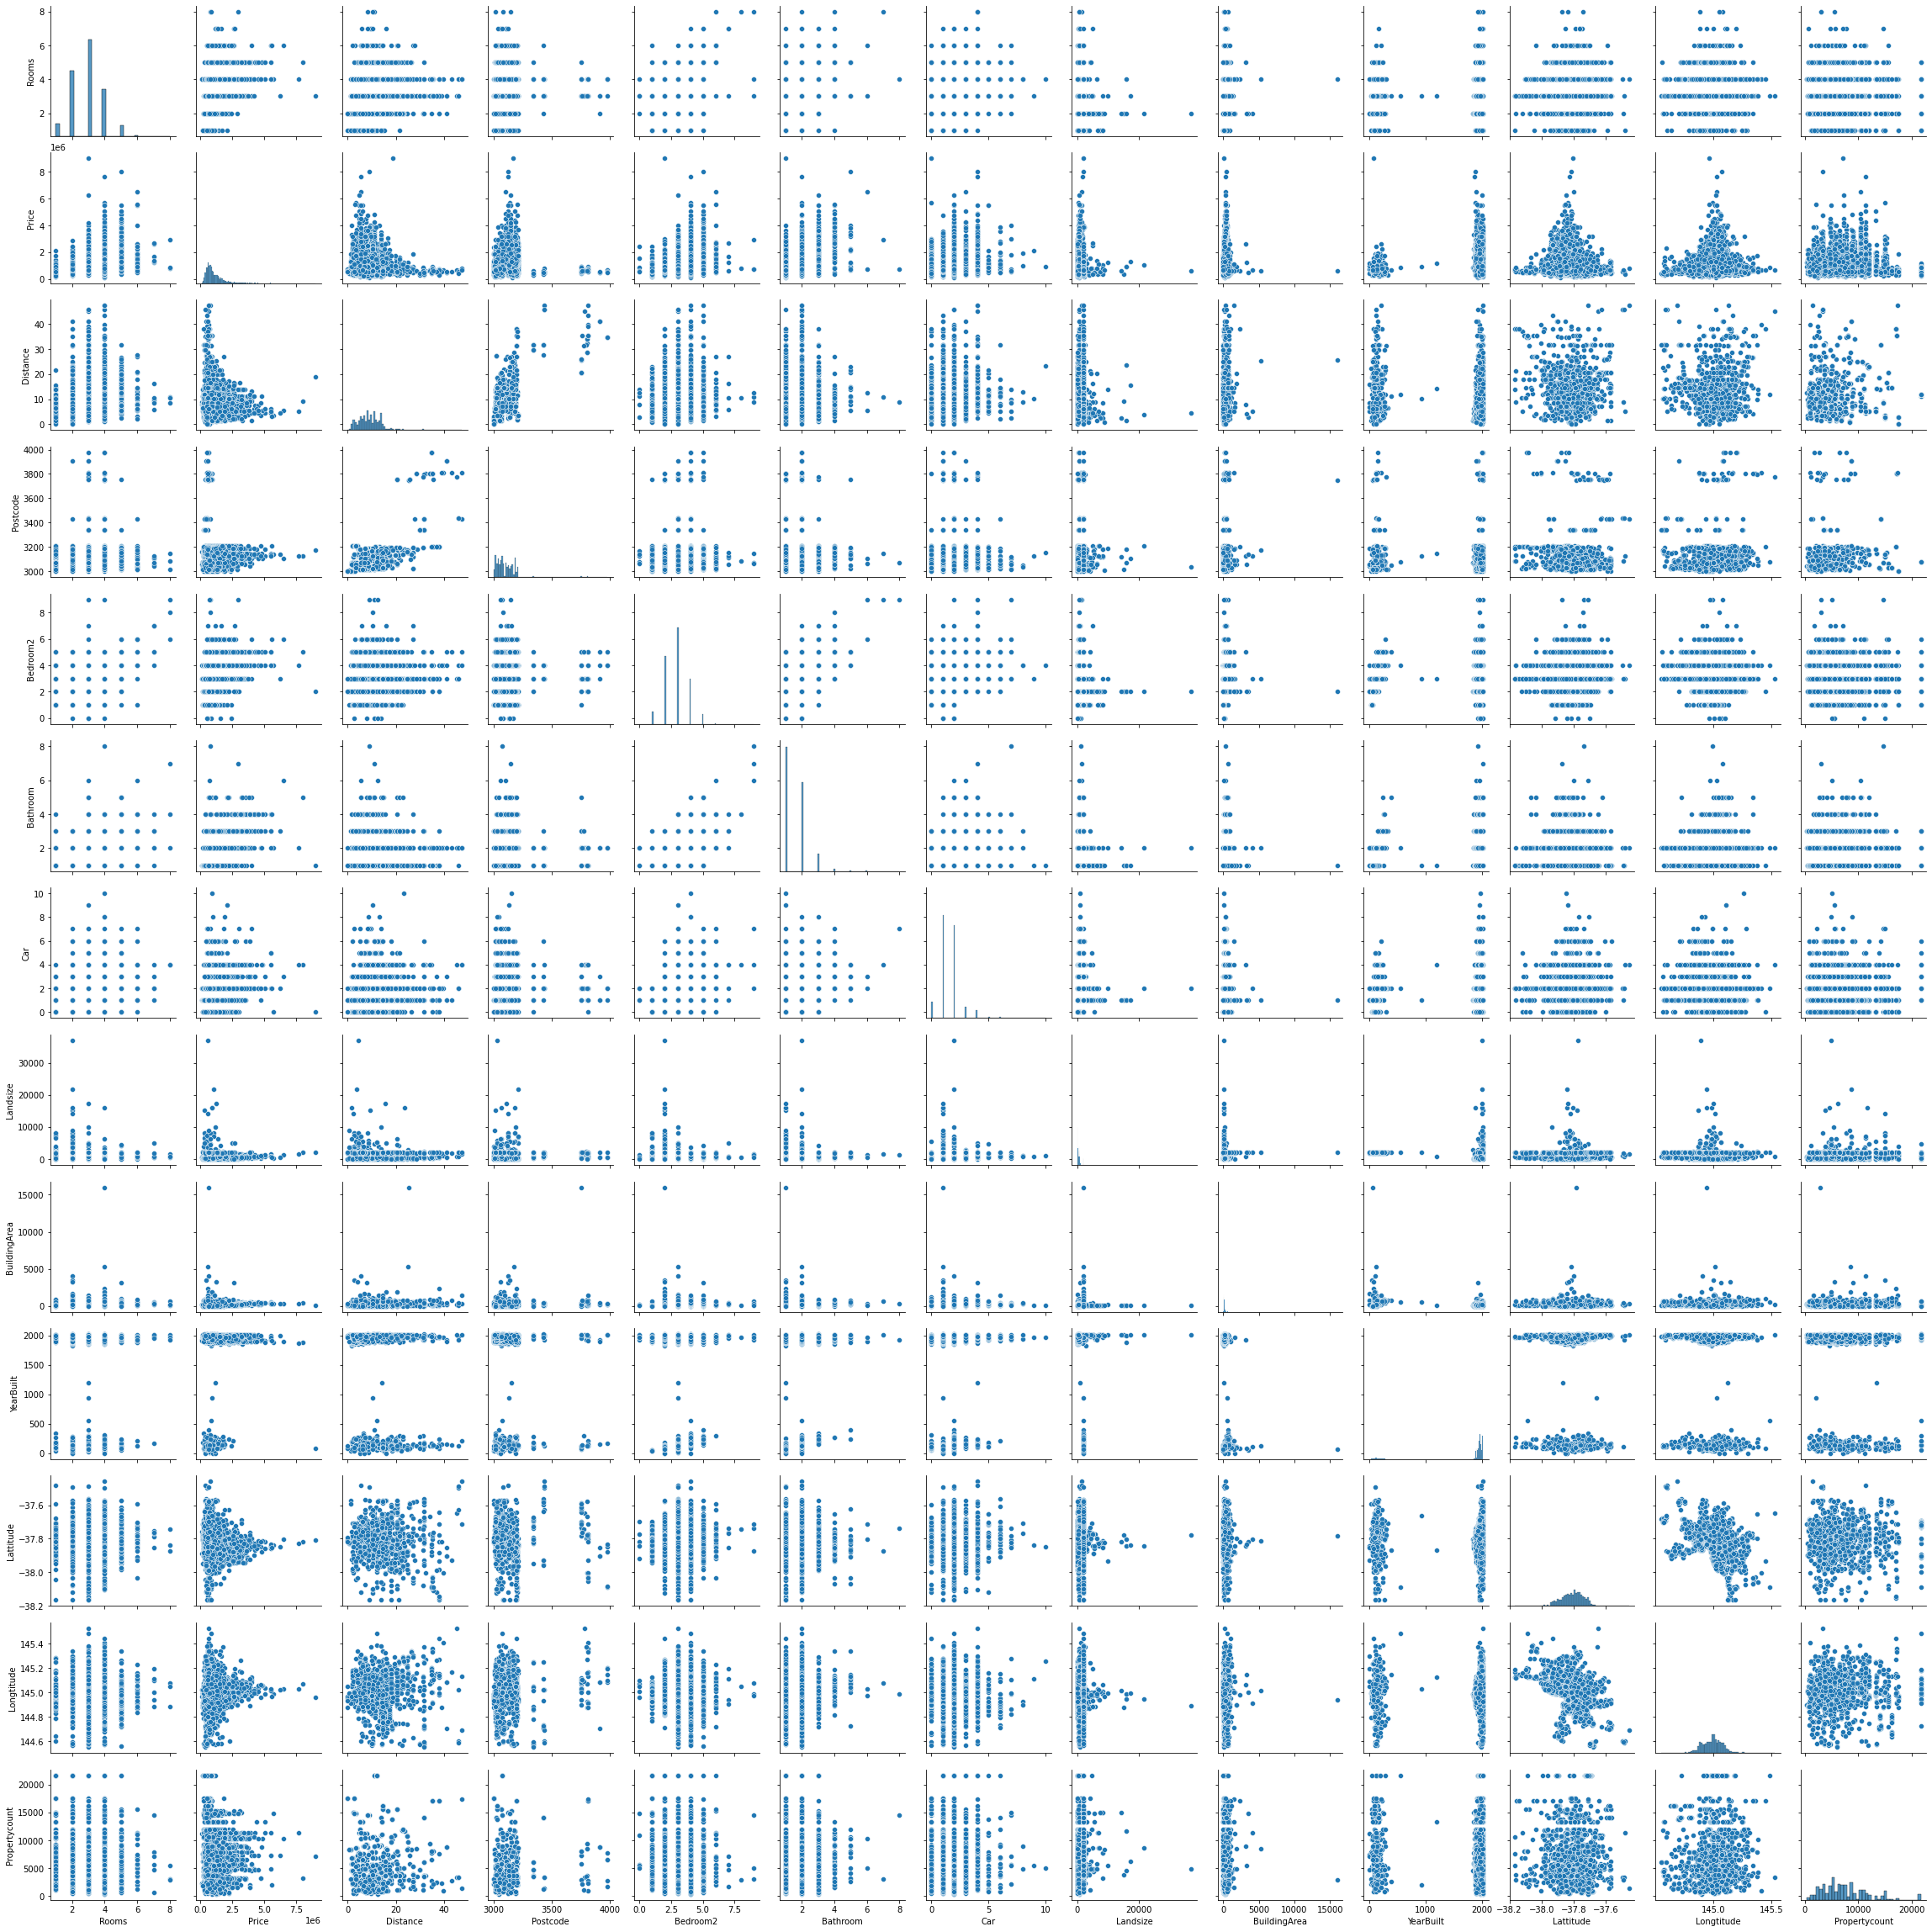

In [ ]:
sns.pairplot(df.dropna())

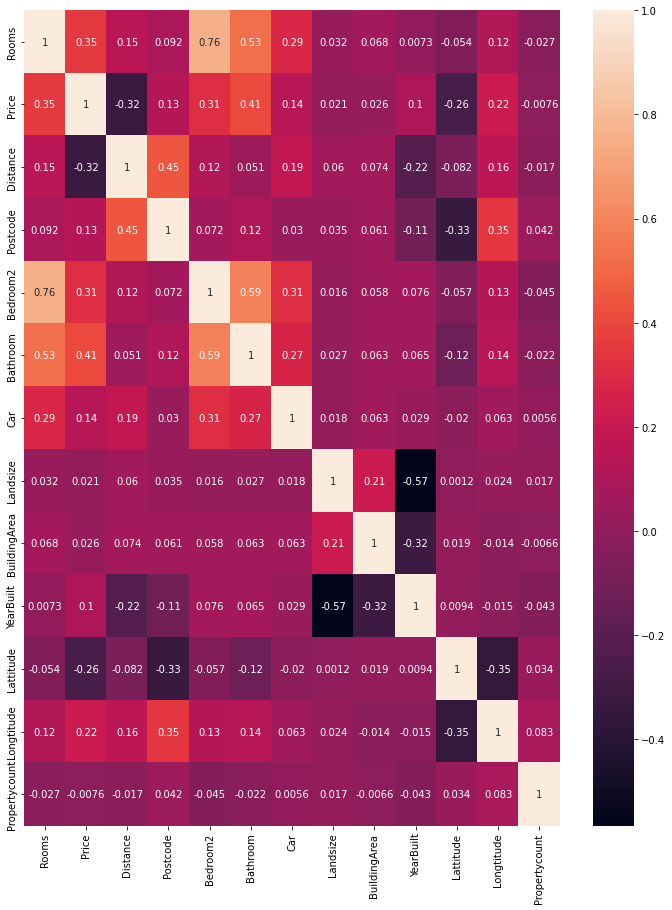

In [ ]:
plt.figure(figsize=(12,15))
sns.heatmap(df[df["Type"]=="h"].corr(), annot=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.shape

(19740, 21)

In [ ]:
df_edited=df.dropna().sort_values("Date")

In [ ]:
from datetime import date

In [ ]:
days_since_start=[(x-df_edited["Date"].min()).days for x in df_edited["Date"]]

In [ ]:
df_edited["Days"]=days_since_start

In [ ]:
df["Type"].value_counts()

h    12992
u     4640
t     2108
Name: Type, dtype: int64

In [ ]:
features_dummy=pd.get_dummies(df_edited[["Type","Method"]])

In [ ]:
allData=df_edited.drop(["Address","Price","Date", "SellerG","Suburb","Type","Method","CouncilArea","Regionname"],axis=1).join(features_dummy)

In [ ]:
X=allData

In [ ]:
y=df_edited["Price"]

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.4)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(model.intercept_)

-134343834.9641886


In [ ]:
X.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount', 'Days', 'Type_h', 'Type_t', 'Type_u', 'Method_PI',
       'Method_S', 'Method_SA', 'Method_SP', 'Method_VB'],
      dtype='object')

In [ ]:
coeff_df=pd.DataFrame(model.coef_, X.columns, columns=["Coeff"])

In [ ]:
coeff_df.sort_values("Coeff", ascending=False)

,Coeff
Longtitude,586.4k
Type_h,259.8k
Rooms,252.8k
Bathroom,222.2k
Car,49.4k
Method_S,45.5k
Method_VB,40.5k
Postcode,1.5k
Days,144.1
YearBuilt,46.9


In [ ]:
predictions = model.predict(X_test)

(200000.0, 1000000.0)

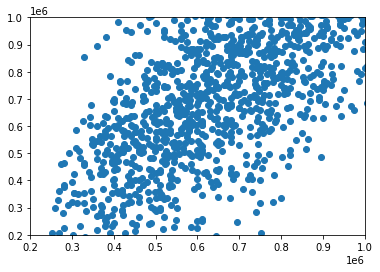

In [ ]:
plt.scatter(y_test, predictions)
plt.ylim([200000,1000000])
plt.xlim([200000,1000000])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


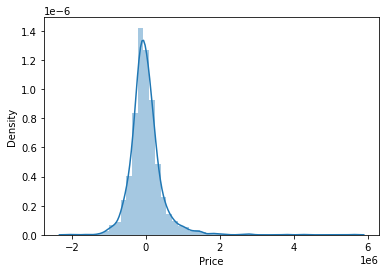

In [ ]:
sns.distplot((y_test-predictions),bins=50)

In [ ]:
from sklearn import metrics

In [ ]:
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 289170.7624961027
MSE: 193661531429.84125
RMSE: 440069.91652445553
